In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# df初期化
df_label = pd.read_csv('data/label.csv', index_col='id')

correct_label = [
    [0, 17,'表','green'],
    [17, 27, '表左下','blue'],
    [27, 41, '表','green'],
    [41, 48, '縦','yellow'],
    [48, 62, '表','green'],
    [62, 67, '表右下','orange'],
    [67, 77, '表','green'],
    [77, 84, '縦逆','brown'],
    [84, 93, '表','green'],
    [93, 102,'裏','black'],
    [102, 120,'表','green']
]

# 塗りつぶす関数
def fill_color(label):
    for i in range(len(label)):
        plt.axvspan(label[i][0], label[i][1], color=label[i][3], alpha=0.3 ,label=label[i][2])

In [3]:
# CSVファイルからデータを読み込む
df_acc = pd.read_csv('data/acc.csv', index_col=0)
df_gyro = pd.read_csv('data/gyro.csv', index_col=0)
df_pre = pd.read_csv('data/pre.csv', index_col=0)

# ハイパスフィルターをかける 0.2 2秒分
df_acc['high_x'] = df_acc['x'].rolling(10).mean()
df_acc['high_y'] = df_acc['y'].rolling(10).mean()
df_acc['high_z'] = df_acc['z'].rolling(10).mean()

# ローパスフィルターをかける 10秒分
df_acc['low_x'] = df_acc['x'].rolling(50).median()
df_acc['low_y'] = df_acc['y'].rolling(50).median()
df_acc['low_z'] = df_acc['z'].rolling(50).median()

# ハイパスフィルターをかける 0.2 2秒分
df_gyro['high_x'] = df_gyro['x'].rolling(10).mean()
df_gyro['high_y'] = df_gyro['y'].rolling(10).mean()
df_gyro['high_z'] = df_gyro['z'].rolling(10).mean()

# ローパスフィルターをかける 10秒分
df_gyro['low_x'] = df_gyro['x'].rolling(50).median()
df_gyro['low_y'] = df_gyro['y'].rolling(50).median()
df_gyro['low_z'] = df_gyro['z'].rolling(50).median()

# ラベルを変える
df_gyro['pitch'] = df_gyro['low_x']
df_gyro['roll'] = df_gyro['low_y']
df_gyro['yaw'] = df_gyro['low_z']

# ハイパスフィルターをかける 0.3 2秒分
df_pre['high_p'] = df_pre['p'].rolling(10).mean()

# ローパスフィルターをかける 10秒分
df_pre['low_p'] = df_pre['p'].rolling(50).median()

In [4]:
# それぞれに処理
# 加速度が9以上の時plus,-9以下の時minus,それ以外の時default
df_acc['pro_acc_x'] = df_acc['low_x'].apply(lambda x: 'plus' if x > 9 else 'minus' if x < -9 else 'default')
df_acc['pro_acc_y'] = df_acc['low_y'].apply(lambda x: 'plus' if x > 9 else 'minus' if x < -9 else 'default')
df_acc['pro_acc_z'] = df_acc['low_z'].apply(lambda x: 'plus' if x > 9 else 'minus' if x < -9 else 'default')

# 角速度が1以上の時plus,-1以下の時minus,2以上のときover_plus,-2以下の時over_minus,それ以外の時default
df_gyro['pro_gyro_x'] = df_gyro['x'].apply(lambda x: 'plus' if x > 1 else 'minus' if x < -1 else 'over_plus' if x > 2 else 'over_minus' if x < -2 else 'default')
df_gyro['pro_gyro_y'] = df_gyro['y'].apply(lambda x: 'plus' if x > 1 else 'minus' if x < -1 else 'over_plus' if x > 2 else 'over_minus' if x < -2 else 'default')
df_gyro['pro_gyro_z'] = df_gyro['z'].apply(lambda x: 'plus' if x > 1 else 'minus' if x < -1 else 'over_plus' if x > 2 else 'over_minus' if x < -2 else 'default')


| pro_acc_x | pro_acc_y | pro_acc_z | label | color |
| - | - | - | - | - |
| default | default | plus | 1 | green |
| default | default | minus | 2 | black |
| default | plus | default | 3 | yellow |
| default | minus | default | 4 | brown |
| plus | default | default | 5 | orange |
| minus | default | default | 6 | blue |

In [5]:
# 色の宣言
label_colors =  {
    0: 'white',
    1: 'green',
    2: 'black',
    3: 'yellow',
    4: 'brown',
    5: 'blue',
    6: 'orange'
}

In [6]:
estimation_label = []
for i in range(len(df_acc)):
    time = df_acc.index[i]
    x = df_acc['pro_acc_x'][time]
    y = df_acc['pro_acc_y'][time]
    z = df_acc['pro_acc_z'][time]
    if x == 'default' and y == 'default' and z == 'plus':
        estimation_label.append([time,1])
    elif x == 'default' and y == 'default' and z == 'minus':
        estimation_label.append([time,2])
    elif x == 'default' and y == 'plus' and z == 'default':
        estimation_label.append([time,3])
    elif x == 'default' and y == 'minus' and z == 'default':
        estimation_label.append([time,4])
    elif x == 'plus' and y == 'default' and z == 'default':
        estimation_label.append([time,5])
    elif x == 'minus' and y == 'default' and z == 'default':
        estimation_label.append([time,6])
    else:
        estimation_label.append([time,0])

# print(estimation_label)

In [7]:
import pandas as pd

# 空のデータフレームを作成
estimation_label_df = pd.DataFrame(columns=['time', 'label'])

for i in range(len(df_acc)):
    time = df_acc.index[i]
    x = df_acc['pro_acc_x'][time]
    y = df_acc['pro_acc_y'][time]
    z = df_acc['pro_acc_z'][time]
    label = 0

    if x == 'default' and y == 'default' and z == 'plus':
        label = 1
    elif x == 'default' and y == 'default' and z == 'minus':
        label = 2
    elif x == 'default' and y == 'plus' and z == 'default':
        label = 3
    elif x == 'default' and y == 'minus' and z == 'default':
        label = 4
    elif x == 'plus' and y == 'default' and z == 'default':
        label = 5
    elif x == 'minus' and y == 'default' and z == 'default':
        label = 6

    # データフレームに行を追加
    new_row = pd.DataFrame({'time': [time], 'label': [label]})
    estimation_label_df = pd.concat([estimation_label_df, new_row], ignore_index=True)

# インデックスを設定（必要に応じて）
# estimation_label_df.set_index('time', inplace=True)

# データフレームの内容を表示
print(estimation_label_df)


             time label
0        0.023483     0
1        0.025860     0
2        0.028237     0
3        0.030614     0
4        0.032991     0
...           ...   ...
50329  119.690333     1
50330  119.692710     1
50331  119.695087     1
50332  119.697463     1
50333  119.699840     1

[50334 rows x 2 columns]


In [8]:
# estimation_label_dfの値が切り替わるtimeを取得
labels = estimation_label_df['label'].values
change_points = []
for i in range(len(labels)-1):
    if labels[i] != labels[i+1]:
        change_points.append(i)

# 最後の値を追加
change_points.append(len(labels)-1)

times  = estimation_label_df['time'].values
change_times = []
for point in change_points:
    change_times.append(times[point])

print(change_points)
print(change_times)

[48, 7142, 7422, 11124, 11287, 17231, 17426, 19893, 20120, 26155, 26299, 28033, 28241, 32431, 32532, 35081, 35250, 38897, 39080, 39336, 39439, 42910, 43019, 43113, 43198, 43238, 43287, 50333]
[0.137572856, 17.0037927, 17.66931348, 26.47081885, 26.85824635, 40.99334663, 41.45688184, 47.32294059, 47.86248449, 62.2067197, 62.55136111, 66.67279533, 67.16717715, 77.12848887, 77.3709258, 83.43184731, 83.83353173, 92.50895908, 92.94391861, 93.55238652, 93.79719981, 102.0495476, 102.3086217, 102.5329935, 102.7364505, 102.8315236, 102.9479881, 119.6998402]


In [9]:
# 区間とラベルの対応を作成
estimation = []

for i in range(len(change_points)):
    try:
        start = change_times[i-1]
    except:
        start = 0
    end = change_times[i]
    label = labels[change_points[i]]
    color = label_colors[label]
    estimation.append([start, end, label,color])

In [10]:
print(estimation)

[[119.6998402, 0.137572856, 0, 'white'], [0.137572856, 17.0037927, 1, 'green'], [17.0037927, 17.66931348, 0, 'white'], [17.66931348, 26.47081885, 5, 'blue'], [26.47081885, 26.85824635, 0, 'white'], [26.85824635, 40.99334663, 1, 'green'], [40.99334663, 41.45688184, 0, 'white'], [41.45688184, 47.32294059, 3, 'yellow'], [47.32294059, 47.86248449, 0, 'white'], [47.86248449, 62.2067197, 1, 'green'], [62.2067197, 62.55136111, 0, 'white'], [62.55136111, 66.67279533, 6, 'orange'], [66.67279533, 67.16717715, 0, 'white'], [67.16717715, 77.12848887, 1, 'green'], [77.12848887, 77.3709258, 0, 'white'], [77.3709258, 83.43184731, 4, 'brown'], [83.43184731, 83.83353173, 0, 'white'], [83.83353173, 92.50895908, 1, 'green'], [92.50895908, 92.94391861, 0, 'white'], [92.94391861, 93.55238652, 5, 'blue'], [93.55238652, 93.79719981, 0, 'white'], [93.79719981, 102.0495476, 2, 'black'], [102.0495476, 102.3086217, 0, 'white'], [102.3086217, 102.5329935, 5, 'blue'], [102.5329935, 102.7364505, 0, 'white'], [102.7

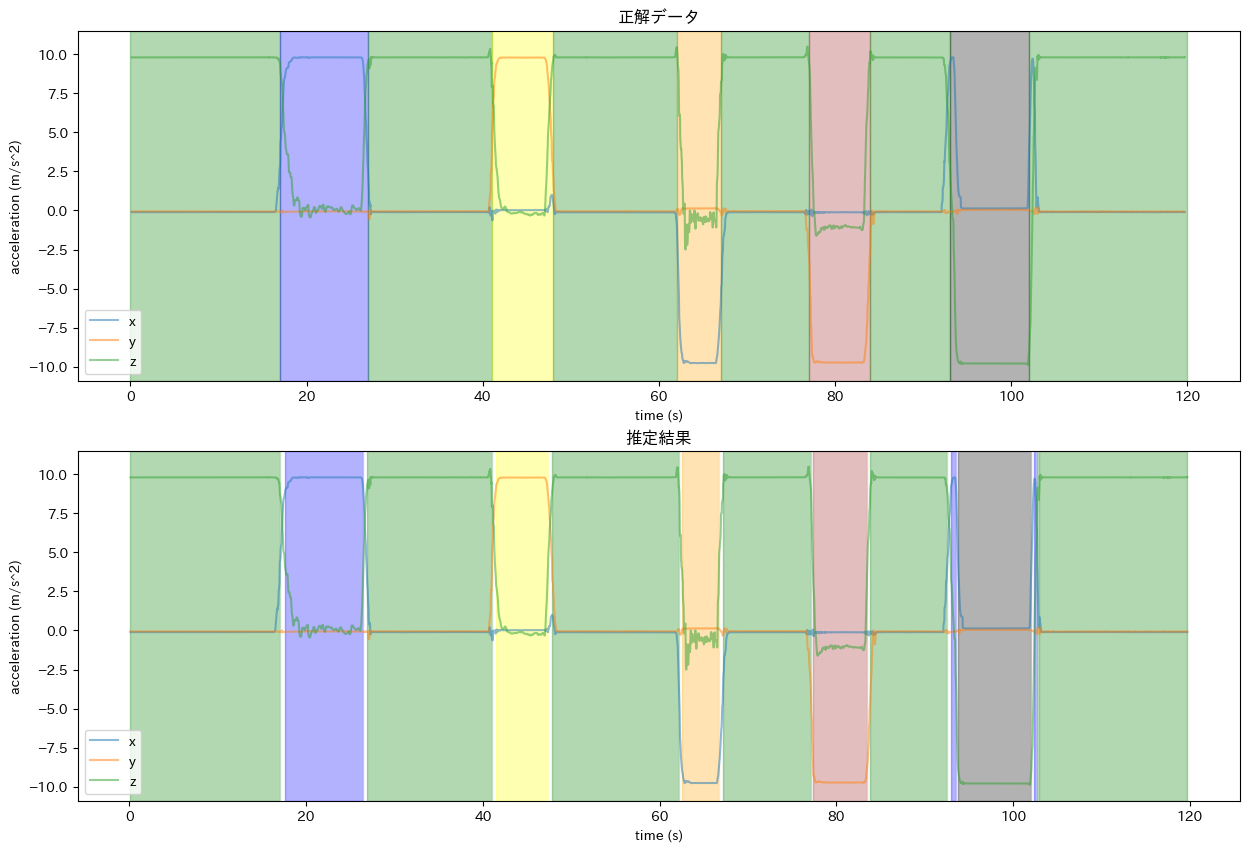

In [19]:
# プロットを作成
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# グラフをプロット
# plt.plot(estimation_label_df.index, estimation_label_df['label'], label='estimation', alpha=0.5)
ax1.plot(df_acc.index, df_acc['low_x'], label='x', alpha=0.5)
ax1.plot(df_acc.index, df_acc['low_y'], label='y', alpha=0.5)
ax1.plot(df_acc.index, df_acc['low_z'], label='z', alpha=0.5)


# x軸とy軸のラベルを設定
ax1.set_xlabel('time (s)')
ax1.set_ylabel('acceleration (m/s^2)')

# 凡例を表示
ax1.legend()

# グラフタイトル
ax1.set_title('正解データ')

for i in range(len(correct_label)):
    ax1.axvspan(correct_label[i][0], correct_label[i][1], color=correct_label[i][3],label=correct_label[i][2], alpha=0.3)

# グラフをプロット
# plt.plot(estimation_label_df.index, estimation_label_df['label'], label='estimation', alpha=0.5)
ax2.plot(df_acc.index, df_acc['low_x'], label='x', alpha=0.5)
ax2.plot(df_acc.index, df_acc['low_y'], label='y', alpha=0.5)
ax2.plot(df_acc.index, df_acc['low_z'], label='z', alpha=0.5)


# x軸とy軸のラベルを設定
ax2.set_xlabel('time (s)')
ax2.set_ylabel('acceleration (m/s^2)')

# 凡例を表示
ax2.legend()

# グラフタイトル
ax2.set_title('推定結果')

for i in range(len(estimation)):
    ax2.axvspan(estimation[i][0], estimation[i][1], color=estimation[i][3],label=estimation[i][2], alpha=0.3)

# グラフを表示
plt.show()

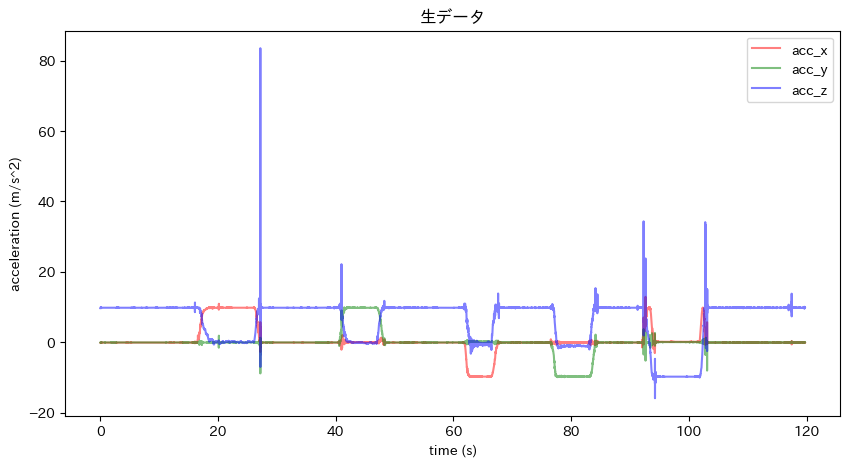

In [16]:
# プロットを作成
plt.figure(figsize=(10, 5))

# グラフをプロット
plt.plot(df_acc.index, df_acc['x'], label='acc_x', alpha=0.5, color='red')
plt.plot(df_acc.index, df_acc['y'], label='acc_y', alpha=0.5, color='green')
plt.plot(df_acc.index, df_acc['z'], label='acc_z', alpha=0.5, color='blue')

# x軸とy軸のラベルを設定
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

# 凡例を表示
plt.legend()

# グラフタイトル
plt.title('生データ')

# fill_color(correct_label)

# グラフを表示
plt.show()

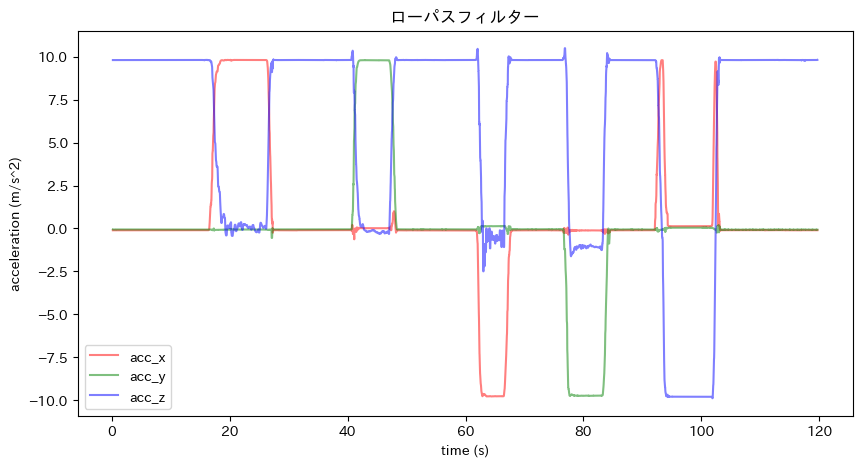

In [17]:
# プロットを作成
plt.figure(figsize=(10, 5))

# グラフをプロット
plt.plot(df_acc.index, df_acc['low_x'], label='acc_x', alpha=0.5, color='red')
plt.plot(df_acc.index, df_acc['low_y'], label='acc_y', alpha=0.5, color='green')
plt.plot(df_acc.index, df_acc['low_z'], label='acc_z', alpha=0.5, color='blue')

# x軸とy軸のラベルを設定
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

# 凡例を表示
plt.legend()
# グラフタイトル
plt.title('ローパスフィルター')
# fill_color(correct_label)

# グラフを表示
plt.show()

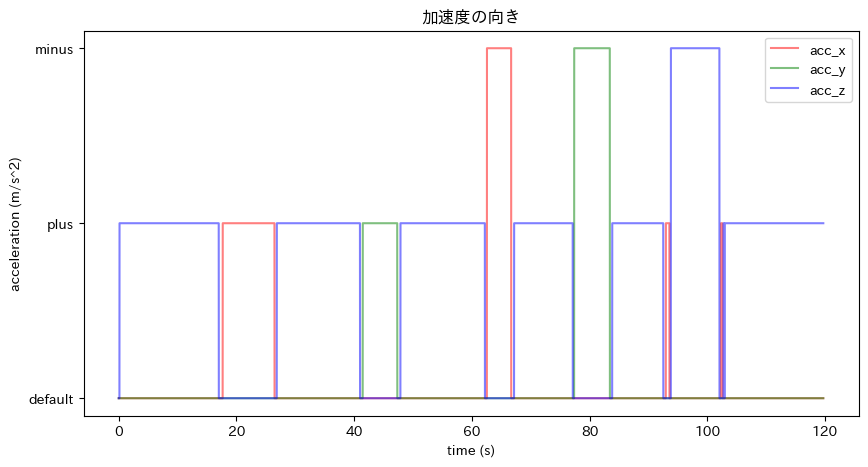

In [18]:
# プロットを作成
plt.figure(figsize=(10, 5))

# グラフをプロット
plt.plot(df_acc.index, df_acc['pro_acc_x'], label='acc_x', alpha=0.5, color='red')
plt.plot(df_acc.index, df_acc['pro_acc_y'], label='acc_y', alpha=0.5, color='green')
plt.plot(df_acc.index, df_acc['pro_acc_z'], label='acc_z', alpha=0.5, color='blue')

# x軸とy軸のラベルを設定
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

# 凡例を表示
plt.legend()

# グラフタイトル
plt.title('加速度の向き')

# fill_color(correct_label)

# グラフを表示
plt.show()

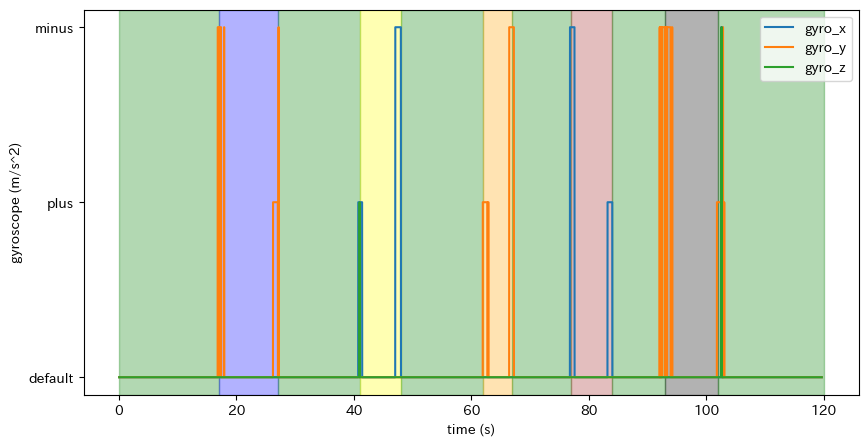

In [15]:
# プロットを作成
plt.figure(figsize=(10, 5))

# グラフをプロット
plt.plot(df_gyro.index, df_gyro['pro_gyro_x'], label='gyro_x')
plt.plot(df_gyro.index, df_gyro['pro_gyro_y'], label='gyro_y')
plt.plot(df_gyro.index, df_gyro['pro_gyro_z'], label='gyro_z')

# plt.plot(df_pre.index, df_pre['low_p'], label='pre_x')


# x軸とy軸のラベルを設定
plt.xlabel('time (s)')
plt.ylabel('gyroscope (m/s^2)')

# 凡例を表示
plt.legend()

fill_color(correct_label)

# グラフを表示
plt.show()
